<a href="https://colab.research.google.com/github/Fissy1/CV-Portfolio-Projects/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To import the dataset
from google.colab import files
uploaded = files.upload()

Saving nigeria_houses_data.csv to nigeria_houses_data (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
#to view the data in the dataset
house_data = pd.read_csv('nigeria_houses_data.csv')
house_data.head()

,price,bedrooms,bathrooms,toilets,parking_space,title,town,state
0,450000000.0,6,5,5,4,Detached Duplex,Mabushi,Abuja
1,800000000.0,4,5,5,4,Terraced Duplexes,Katampe,Abuja
2,120000000.0,4,5,5,4,Detached Duplex,Lekki,Lagos
3,40000000.0,4,4,5,6,Detached Duplex,Ajah,Lagos
4,75000000.0,4,4,5,2,Semi Detached Duplex,Lekki,Lagos


In [ ]:
#to get the basic info about the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          24326 non-null  float64
 1   bedrooms       24326 non-null  int64  
 2   bathrooms      24326 non-null  int64  
 3   toilets        24326 non-null  int64  
 4   parking_space  24326 non-null  int64  
 5   title          24326 non-null  object 
 6   town           24326 non-null  object 
 7   state          24326 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [ ]:
#to check if there are any null values in the data set
house_data.isna().sum()

price            0
bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
dtype: int64

In [ ]:
#Exploratory Data Analysis
house_data['state'].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

In [ ]:
house_data['town'].unique()

array(['Mabushi', 'Katampe', 'Lekki', 'Ajah', 'Epe', 'Lokogoma District',
       'Oredo', 'Victoria Island (VI)', 'Mowe Ofada', 'Ikeja', 'Ikoyi',
       'Magodo', 'Kaura', 'Galadimawa', 'Gwarinpa', 'Abeokuta North',
       'Lugbe District', 'Ibeju Lekki', 'Yaba', 'Sango Ota',
       'Ifako-Ijaiye', 'Agege', 'Ikorodu', 'Jahi', 'Ibadan', 'Orozo',
       'Ifo', 'Owerri North', 'Guzape District', 'Idu Industrial',
       'Owerri Municipal', 'Isheri North', 'Utako', 'Port Harcourt',
       'Kuje', 'Isheri', 'Life Camp', 'Ipaja', 'Ado-Odo/Ota', 'Dape',
       'Mushin', 'Ejigbo', 'Isolo', 'Ojodu', 'Gaduwa', 'Enugu', 'Dakwo',
       'Asokoro District', 'Alimosho', 'Sagamu', 'Chikun', 'Egbeda',
       'Wuye', 'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Ibafo',
       'Surulere', 'Obio-Akpor', 'Ayobo', 'Apo', 'Mowe Town',
       'Ibadan South-West', 'Wuse 2', 'Durumi', 'Simawa', 'Arepo',
       'Ikotun', 'Oluyole', 'Maitama District', 'Maryland', 'Ido',
       'Karsana', 'Wuse', 'Ilorin West', 

<Axes: xlabel='state'>

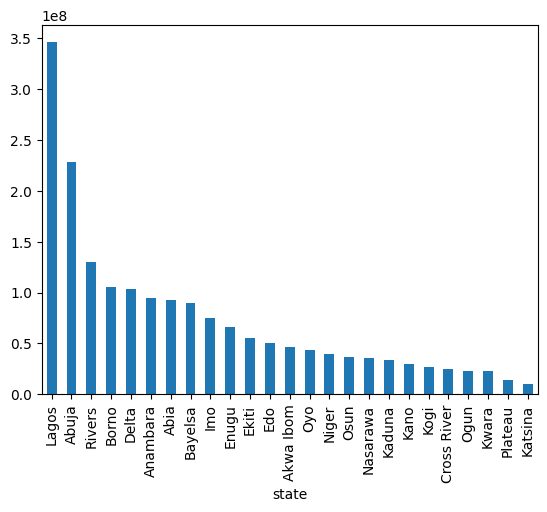

In [ ]:
#to know if there are outliers between state and price
house_data.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='town'>

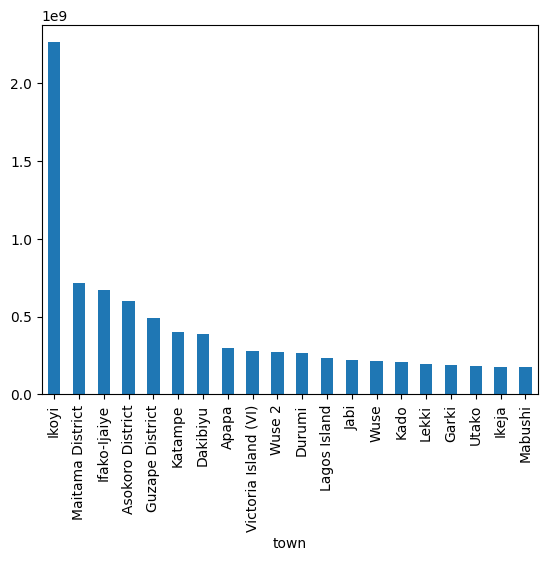

In [ ]:
#to further confirm outliers between state and price (Lagos)
house_data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [ ]:
#To further check and confirm outliers (towns in Lagos State)
print(house_data[house_data["town"]=="Ikoyi"].max())
print(house_data[house_data["town"]=="Ifako-Ijaiye"].max())
print(house_data[house_data["town"]=="Ikeja"].max())
print(house_data[house_data["town"]=="Victoria Island (VI)"].max())
print(house_data[house_data["town"]=="Apapa"].max())
print(house_data[house_data["town"]=="Lagos Island"].max())
print(house_data[house_data["town"]=="Lekki"].max())

price              1800000000000.0
bedrooms                         9
bathrooms                        9
toilets                          9
parking_space                    9
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
dtype: object
price                55000000000.0
bedrooms                         7
bathrooms                        8
toilets                          8
parking_space                    8
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
dtype: object
price                 1440000000.0
bedrooms                         9
bathrooms                        9
toilets                          9
parking_space                    9
title            Terraced Duplexes
town                         Ikeja
state                        Lagos
dtype: object
price                    6000000000.0
bedrooms                            8
bathrooms                           8
toil

In [ ]:
#to remove outliers by trimming the dataset using percentile
trimmed_house_data = q1, q9 = house_data["price"].quantile([0.20,0.80])
mask_data = house_data["price"].between(q1,q9)
trimmed_house_data = house_data[mask_data]
trimmed_house_data

,price,bedrooms,bathrooms,toilets,parking_space,title,town,state
2,120000000.0,4,5,5,4,Detached Duplex,Lekki,Lagos
4,75000000.0,4,4,5,2,Semi Detached Duplex,Lekki,Lagos
6,65000000.0,4,5,5,4,Detached Duplex,Lekki,Lagos
8,200000000.0,1,1,1,1,Detached Duplex,Lekki,Lagos
9,60000000.0,4,4,5,5,Detached Duplex,Ajah,Lagos
...,...,...,...,...,...,...,...,...
24318,110000000.0,4,5,5,4,Semi Detached Duplex,Lekki,Lagos
24320,80000000.0,3,4,4,5,Detached Duplex,Lekki,Lagos
24323,68000000.0,4,5,5,4,Detached Duplex,Lekki,Lagos
24324,78000000.0,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos


In [ ]:
#to check how many towns in each state
total_town = trimmed_house_data['state'].value_counts()
total_town

state
Lagos     12080
Abuja      2033
Rivers      279
Oyo         176
Imo         144
Name: count, dtype: int64

In [ ]:
#to have more accuracy, we have to remove states with less than 100 towns from the dataset
trimmed_house_data = trimmed_house_data[~trimmed_house_data['state'].isin(total_town[total_town < 100].index)]

In [ ]:
#to view remaining states with more than 100 towns as this is the refined dataset we'll use to have our predictions
total_town = trimmed_house_data['state'].value_counts()
total_town

state
Lagos     12080
Abuja      2033
Rivers      279
Oyo         176
Imo         144
Name: count, dtype: int64

<Axes: xlabel='state'>

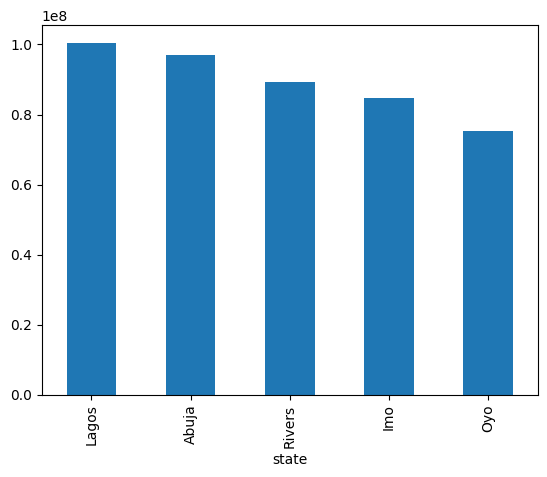

In [ ]:
trimmed_house_data.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='town'>

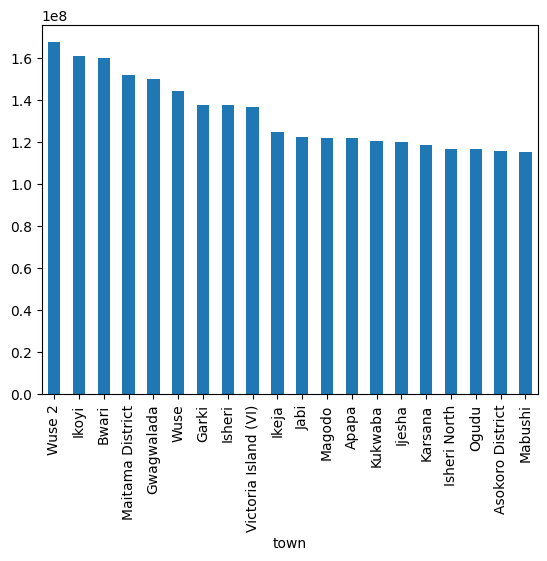

In [ ]:
trimmed_house_data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [ ]:
#to drop some columns (title, town and state)
new_house_data = trimmed_house_data.drop(columns = ['title', 'town', 'state'])
new_house_data

,price,bedrooms,bathrooms,toilets,parking_space
2,120000000.0,4,5,5,4
4,75000000.0,4,4,5,2
6,65000000.0,4,5,5,4
8,200000000.0,1,1,1,1
9,60000000.0,4,4,5,5
...,...,...,...,...,...
24318,110000000.0,4,5,5,4
24320,80000000.0,3,4,4,5
24323,68000000.0,4,5,5,4
24324,78000000.0,3,4,4,3


In [ ]:
#to create a new column for total rooms
new_house_data['total_rooms'] = new_house_data['bedrooms'] + new_house_data['bathrooms'] + new_house_data['toilets'] + new_house_data['parking_space']

In [ ]:
#to view the new dataset table with new column
new_house_data

,price,bedrooms,bathrooms,toilets,parking_space,total_rooms
2,120000000.0,4,5,5,4,18
4,75000000.0,4,4,5,2,15
6,65000000.0,4,5,5,4,18
8,200000000.0,1,1,1,1,4
9,60000000.0,4,4,5,5,18
...,...,...,...,...,...,...
24318,110000000.0,4,5,5,4,18
24320,80000000.0,3,4,4,5,16
24323,68000000.0,4,5,5,4,18
24324,78000000.0,3,4,4,3,14


<Axes: >

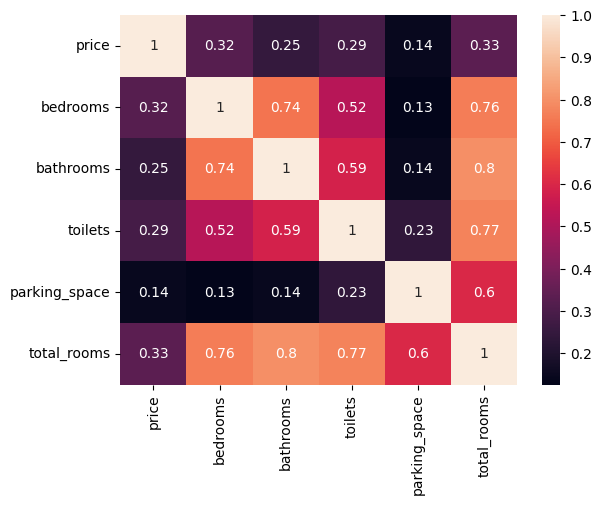

In [ ]:
#to get heatmap
corr = new_house_data.corr()
sns.heatmap(corr, annot=True)

In [ ]:
print(new_house_data.corr())

                  price  bedrooms  bathrooms   toilets  parking_space  \
price          1.000000  0.322577   0.247426  0.285936       0.144405   
bedrooms       0.322577  1.000000   0.744949  0.521243       0.125528   
bathrooms      0.247426  0.744949   1.000000  0.585273       0.144833   
toilets        0.285936  0.521243   0.585273  1.000000       0.234895   
parking_space  0.144405  0.125528   0.144833  0.234895       1.000000   
total_rooms    0.332281  0.761470   0.797112  0.772914       0.601934   

               total_rooms  
price             0.332281  
bedrooms          0.761470  
bathrooms         0.797112  
toilets           0.772914  
parking_space     0.601934  
total_rooms       1.000000  


In [ ]:
rooms = new_house_data.iloc[:,1:].values   #using all other columns as X and price as Y
price = new_house_data['price'].values

X = np.array(rooms)
Y = np.array(price)
X

array([[ 4,  5,  5,  4, 18],
       [ 4,  4,  5,  2, 15],
       [ 4,  5,  5,  4, 18],
       ...,
       [ 4,  5,  5,  4, 18],
       [ 3,  4,  4,  3, 14],
       [ 4,  5,  5,  4, 18]])

In [ ]:
#to split our dataset into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
Y_test

array([1.45e+08, 1.15e+08, 1.35e+08, ..., 1.55e+08, 1.40e+08, 8.50e+07])

In [ ]:
#Calculate variance of Y_train
var_y_train = np.var(Y_train)
mean_y_train = np.mean(Y_train)

In [ ]:
#using linear regression model
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)
Y_train_prediction = model_1.predict(X_train) #to predict on trained data
mse_train = mean_squared_error(Y_train, Y_train_prediction) #to calculate the mean squared error (MSE)
rmse_train = np.sqrt(mse_train) #to calculate the root mean squared error (RMSE)
rse_train = mse_train/var_y_train #to calculate the relative squared error (RSE)
rrse_train = np.sqrt(rse_train) #to calculate the root relative squared error (RMSE)
mae_train = mean_absolute_error(Y_train, Y_train_prediction) #to calculate the mean absolute error (MAE)
rae_train = mae_train/mean_y_train #to calculate the relative absolute error
print('R Squared Score:', model_1.score(X_train,Y_train))
print("Mean Squared Error (MSE) - Training:", mse_train)
print("Root Mean Squared Error (RMSE) - Training:", rmse_train)
print("Relative Squared Error (RSE) - Training:", rse_train)
print("Root Relative Squared Error (RRSE) - Training:", rrse_train)
print("Mean Absolute Error (MAE) - Training:", mae_train)
print("Relative Absolute Error (RAE) - Training:", rae_train)

R Squared Score: 0.13220528128735443
Mean Squared Error (MSE) - Training: 1467293159991485.2
Root Mean Squared Error (RMSE) - Training: 38305262.82368371
Relative Squared Error (RSE) - Training: 0.8677947187126457
Root Relative Squared Error (RRSE) - Training: 0.9315550003690849
Mean Absolute Error (MAE) - Training: 31121587.391526565
Relative Absolute Error (RAE) - Training: 0.31352809267923093


In [ ]:
#Using Decision Tree Regressor Model
model_2 = DecisionTreeRegressor()
model_2.fit(X_train,Y_train)
Y_train_prediction = model_2.predict(X_train) #to predict on trained data
mse_train = mean_squared_error(Y_train, Y_train_prediction) #to calculate the mean squared error (MSE)
rmse_train = np.sqrt(mse_train) #to calculate the root mean squared error (RMSE)
rse_train = mse_train/var_y_train #to calculate the relative squared error (RSE)
rrse_train = np.sqrt(rse_train) #to calculate the root relative squared error (RMSE)
mae_train = mean_absolute_error(Y_train, Y_train_prediction) #to calculate the mean absolute error (MAE)
rae_train = mae_train/mean_y_train #to calculate the relative absolute error
print('R Squared Score:', model_2.score(X_train,Y_train))
print("Mean Squared Error (MSE) - Training:", mse_train)
print("Root Mean Squared Error (RMSE) - Training:", rmse_train)
print("Relative Squared Error (RSE) - Training:", rse_train)
print("Root Relative Squared Error (RRSE) - Training:", rrse_train)
print("Mean Absolute Error (MAE) - Training:", mae_train)
print("Relative Absolute Error (RAE) - Training:", rae_train)

R Squared Score: 0.2575314371012706
Mean Squared Error (MSE) - Training: 1255387962565781.2
Root Mean Squared Error (RMSE) - Training: 35431454.423517264
Relative Squared Error (RSE) - Training: 0.7424685628987294
Root Relative Squared Error (RRSE) - Training: 0.8616661551312836
Mean Absolute Error (MAE) - Training: 27370454.223843638
Relative Absolute Error (RAE) - Training: 0.27573806569077336


In [ ]:
#Using KN Regressor Model
model_3 = KNeighborsRegressor()
model_3.fit(X_train,Y_train)
Y_train_prediction = model_3.predict(X_train) #to predict on trained data
mse_train = mean_squared_error(Y_train, Y_train_prediction) #to calculate the mean squared error (MSE)
rmse_train = np.sqrt(mse_train) #to calculate the root mean squared error (RMSE)
rse_train = mse_train/var_y_train #to calculate the relative squared error (RSE)
rrse_train = np.sqrt(rse_train) #to calculate the root relative squared error (RMSE)
mae_train = mean_absolute_error(Y_train, Y_train_prediction) #to calculate the mean absolute error (MAE)
rae_train = mae_train/mean_y_train #to calculate the relative absolute error
print('R Squared Score:', model_3.score(X_train,Y_train))
print("Mean Squared Error (MSE) - Training:", mse_train)
print("Root Mean Squared Error (RMSE) - Training:", rmse_train)
print("Relative Squared Error (RSE) - Training:", rse_train)
print("Root Relative Squared Error (RRSE) - Training:", rrse_train)
print("Mean Absolute Error (MAE) - Training:", mae_train)
print("Relative Absolute Error (RAE) - Training:", rae_train)

R Squared Score: 0.17658504604951408
Mean Squared Error (MSE) - Training: 1392254531761355.8
Root Mean Squared Error (RMSE) - Training: 37312927.14008585
Relative Squared Error (RSE) - Training: 0.823414953950486
Root Relative Squared Error (RRSE) - Training: 0.9074221475975148
Mean Absolute Error (MAE) - Training: 28606820.960380655
Relative Absolute Error (RAE) - Training: 0.2881935905289453


In [ ]:
#Using Random Forest Regressor Model
model_4 = RandomForestRegressor()
model_4.fit(X_train,Y_train)
Y_train_prediction = model_4.predict(X_train) #to predict on trained data
mse_train = mean_squared_error(Y_train, Y_train_prediction) #to calculate the mean squared error (MSE)
rmse_train = np.sqrt(mse_train) #to calculate the root mean squared error (RMSE)
rse_train = mse_train/var_y_train #to calculate the relative squared error (RSE)
rrse_train = np.sqrt(rse_train) #to calculate the root relative squared error (RMSE)
mae_train = mean_absolute_error(Y_train, Y_train_prediction) #to calculate the mean absolute error (MAE)
rae_train = mae_train/mean_y_train #to calculate the relative absolute error
print('R Squared Score:', model_4.score(X_train,Y_train))
print("Mean Squared Error (MSE) - Training:", mse_train)
print("Root Mean Squared Error (RMSE) - Training:", rmse_train)
print("Relative Squared Error (RSE) - Training:", rse_train)
print("Root Relative Squared Error (RRSE) - Training:", rrse_train)
print("Mean Absolute Error (MAE) - Training:", mae_train)
print("Relative Absolute Error (RAE) - Training:", rae_train)

R Squared Score: 0.2545683728080729
Mean Squared Error (MSE) - Training: 1260397999935533.5
Root Mean Squared Error (RMSE) - Training: 35502084.44493835
Relative Squared Error (RSE) - Training: 0.7454316271919271
Root Relative Squared Error (RRSE) - Training: 0.863383823795609
Mean Absolute Error (MAE) - Training: 27597980.29153587
Relative Absolute Error (RAE) - Training: 0.2780302307124642


In [ ]:
predict = model_1.predict(X_test)
predict

array([1.10501940e+08, 1.10501940e+08, 1.03170100e+08, ...,
       1.28303156e+08, 1.28303156e+08, 9.29628682e+07])

In [ ]:
predict = model_2.predict(X_test)
predict

array([1.21433586e+08, 1.21433586e+08, 1.20756660e+08, ...,
       1.25081081e+08, 1.25081081e+08, 8.40483631e+07])

In [ ]:
predict = model_3.predict(X_test)
predict

array([1.16e+08, 1.16e+08, 1.17e+08, ..., 1.45e+08, 1.45e+08, 7.94e+07])

In [ ]:
predict = model_4.predict(X_test)
predict

array([1.21380344e+08, 1.21380344e+08, 1.20763456e+08, ...,
       1.25125162e+08, 1.25125162e+08, 8.39725276e+07])

In [ ]:
#to make predictions using the baseline model
Y_prediction_baseline = model_2.predict(X_test)

In [ ]:
#to calculate the Mean Squared Error (MSE) as the baseline model performance
MSE_baseline = mean_squared_error(Y_test, Y_prediction_baseline)
print("MSE Baseline Model Performance: ", MSE_baseline)

MSE Baseline Model Performance:  1428371339055064.2


In [ ]:
#hyperparameter tuning using GridSearchCV

# Define the parameter grid to search
DTR = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = DTR, param_grid = param_grid, cv = 5, n_jobs = -1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameter: ", best_params)

best_grid = grid_search.best_estimator_
best_grid

Best Hyperparameter:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=5, max_features='log2', min_samples_leaf=4,
                      min_samples_split=5)

In [ ]:
mean_y_train

99262516.24082346

In [ ]:
def make_prediction(bedrooms, bathrooms, toilets, parking_space, total_rooms):

    data = {"bedrooms":bedrooms,
            "bathrooms":bathrooms,
            "toilets":toilets,
            "parking_space":parking_space,
            "total_rooms":total_rooms
    }

    data = pd.DataFrame(data, index=[0])
    prediction = model_2.predict(data)
    return f"Predicted apartment price: ₦{prediction}"

In [ ]:
#testing
make_prediction(bedrooms = 5, bathrooms = 2, toilets = 2, parking_space = 3, total_rooms = 12)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


'Predicted apartment price: ₦[80000000.]'

In [ ]:
#testing
make_prediction(bedrooms = 2, bathrooms = 2, toilets = 2, parking_space = 1, total_rooms = 7)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


'Predicted apartment price: ₦[66000000.]'